Задание 7. Описательная статистика

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 5.  

Шаг 2. Выполните описательный анализ признаков предложенного датасета (Алгоритм выполнения представлен в практическом занятии по теме 5.1):

2.1 Загрузите датасет;

2.2 Разделите признаки на две группы: категориальные и непрерывные;

2.3 Для каждого из категориальных признаков:
- рассчитайте моду;
- постройте столбчатую диаграмму, отражающую число объектов по каждому значению признака (выбор библиотеки визуализации и соответствующих методов остается за исполнителем);
- на диаграмме каждый столбец должен сопровождаться надписью о количестве элементов с данным значением;   

2.4 Для каждого из непрерывных признаков:
- рассчитайте выборочное среднее, медиану, моду, квартили (0.01, 0.05 и 0.95, 0.99), значения нижнего и верхнего усов;
- постройте вертикальные линии, соответствующие рассчитанным статистикам. Рисунок оснастите легендой;
- постройте плотность распределения и гистограмму;
- объедините на одном графике плотность распределения и вертикальные линии статистик.

Шаг 3. Опубликуйте файл расширения ipynb на платформе Odin

**Описание данных**

Каждый клиент характеризуется следующим набором данных:

|Признак|Описание признака|
|---:|:---|
|`userid`|идентификатор пользователя|
|`score`|баллы кредитного скоринга|
|`City`|город проживания клиента|
|`Gender`|пол|
|`Age`|возраст|
|`Objects`|количество объектов в собственности|
|`Balance`|баланс на счете|
|`Products`|количество продуктов, которыми пользуется клиент|
|`estimated_salary`|заработная плата клиента|

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Аналитик Данных/EDA/clients_bank.csv')

In [29]:
print(df.shape)
print(df.dtypes)
print(df.head(3))

(10000, 9)
userid                int64
score                 int64
City                 object
Gender               object
Age                   int64
Objects               int64
Balance             float64
Products              int64
estimated_salary    float64
dtype: object
     userid  score       City Gender  Age  Objects    Balance  Products  \
0  15677338    619  Ярославль      Ж   42        2        NaN         1   
1  15690047    608    Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502  Ярославль      Ж   42        8  159660.80         3   

   estimated_salary  
0         101348.88  
1         112542.58  
2         113931.57  


In [30]:
# Разделение признаков на категориальные и непрерывные
categorical_features = ['City', 'Gender']
numeric_features = ['score', 'Age', 'Objects', 'Balance', 'Products', 'estimated_salary']

Мода для City: Ярославль


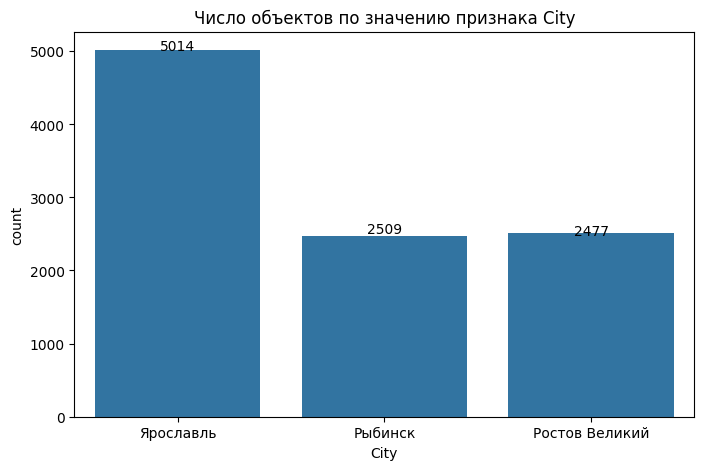

Мода для Gender: М


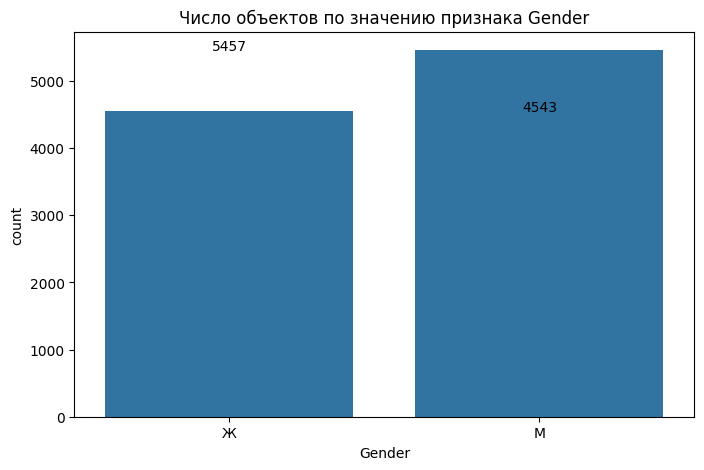

In [31]:
# Для категориальных признаков
for feature in categorical_features:
    mode = df[feature].mode().values[0]
    print(f"Мода для {feature}: {mode}")

    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df)
    for i, count in enumerate(df[feature].value_counts()):
        plt.text(i, count, count, ha='center')
    plt.title(f'Число объектов по значению признака {feature}')
    plt.show()

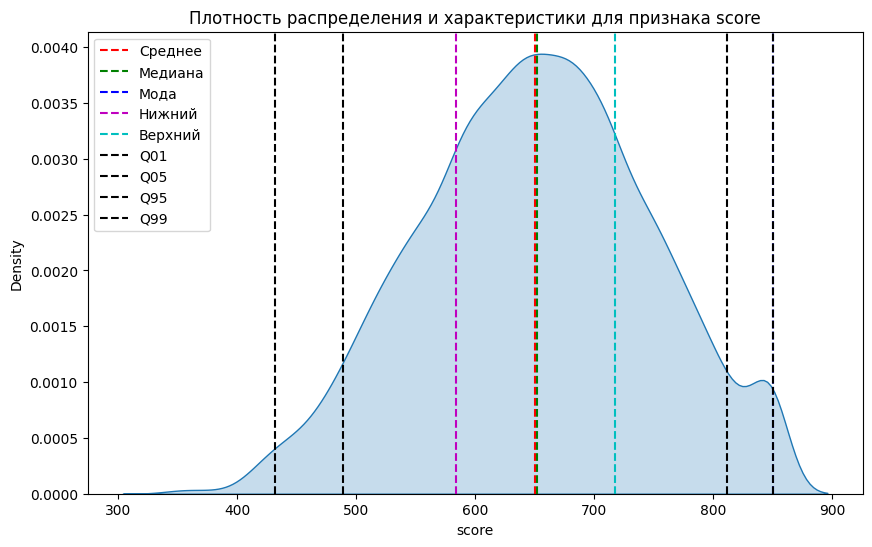

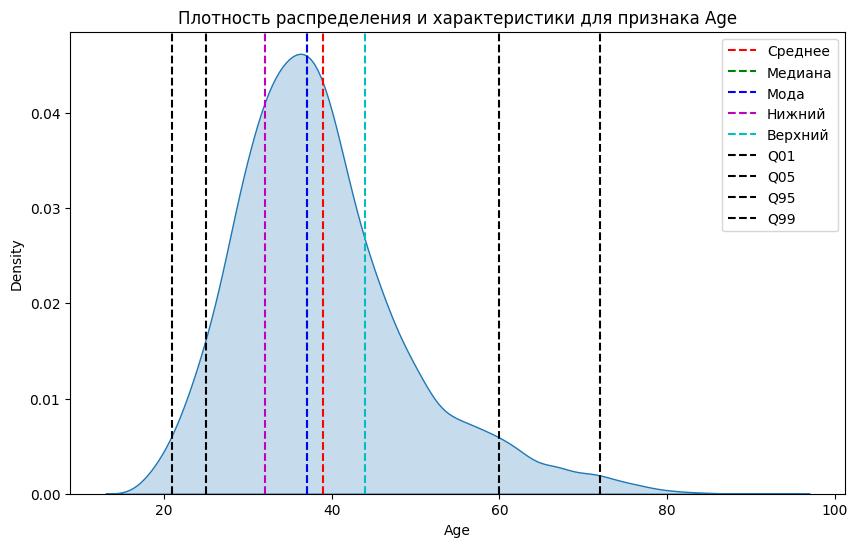

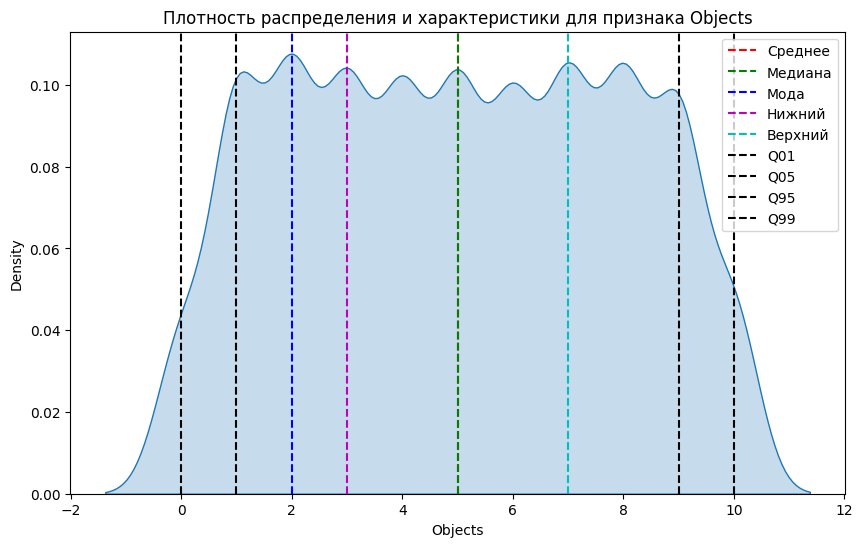

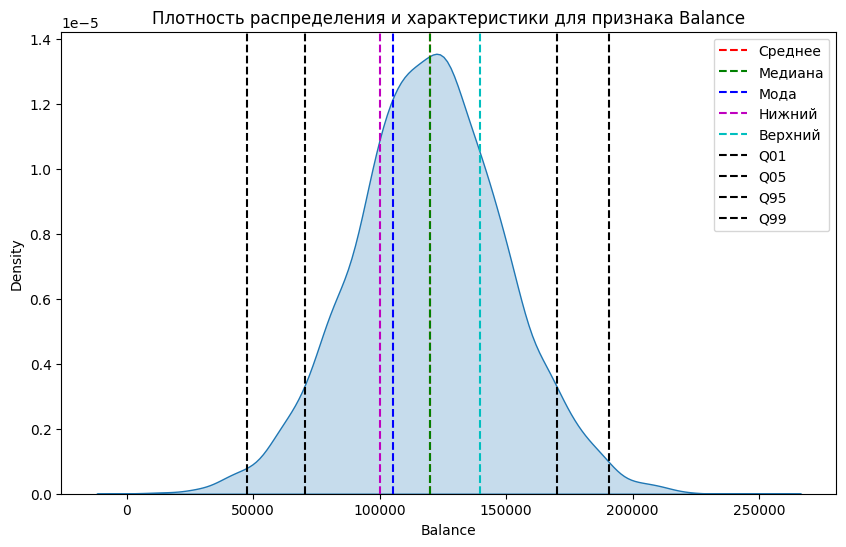

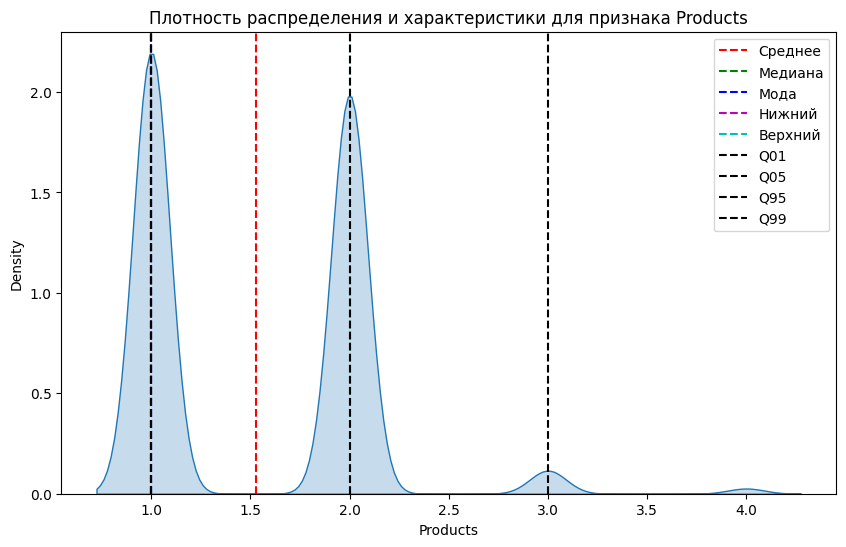

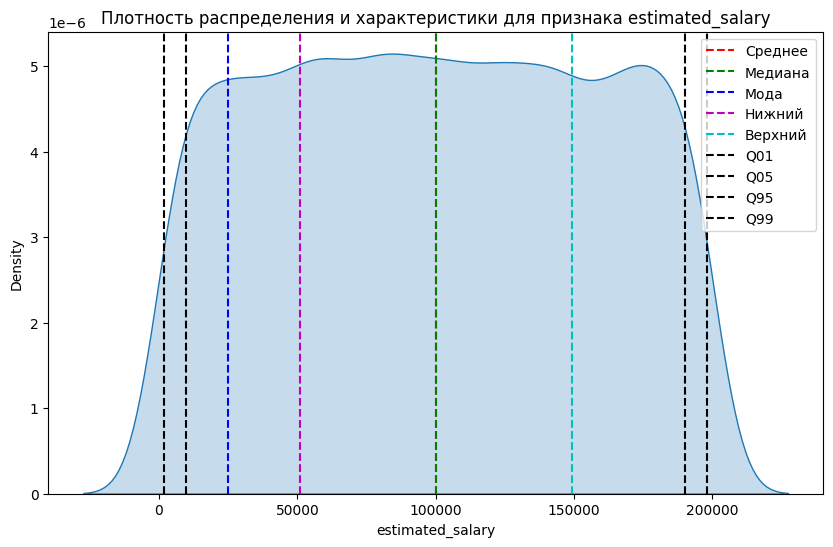

In [34]:
# Для непрерывных признаков
for feature in numeric_features:
    mean = df[feature].mean()
    median = df[feature].median()
    mode = df[feature].mode().values[0]
    q01 = df[feature].quantile(0.01)
    q05 = df[feature].quantile(0.05)
    q95 = df[feature].quantile(0.95)
    q99 = df[feature].quantile(0.99)

    lower = df[feature].quantile(0.25)
    upper = df[feature].quantile(0.75)

    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[feature], fill=True)
    plt.axvline(mean, color='r', linestyle='--', label='Среднее')
    plt.axvline(median, color='g', linestyle='--', label='Медиана')
    plt.axvline(mode, color='b', linestyle='--', label='Мода')
    plt.axvline(lower, color='m', linestyle='--', label='Нижний')
    plt.axvline(upper, color='c', linestyle='--', label='Верхний')
    plt.axvline(q01, color='k', linestyle='--', label='Q01')
    plt.axvline(q05, color='k', linestyle='--', label='Q05')
    plt.axvline(q95, color='k', linestyle='--', label='Q95')
    plt.axvline(q99, color='k', linestyle='--', label='Q99')
    plt.legend()
    plt.title(f'Плотность распределения и характеристики для признака {feature}')
    plt.show()